In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from myfunc import timer
from myfunc import DirMan
import config
import matplotlib

pd.set_option('display.max_columns', None)
# font = {'family': 'Times New Roman'}
font = {'family': 'Arial'}
matplotlib.rc('font', **font)

# configuration
# resolution = "0p1"
resolution = "500"
region = [-180,180,-60,90]
data_path = f'/tera04/zhwei/xionghui/bedrock/run/{resolution}/'
post_data_path = '/tera04/zhwei/xionghui/bedrock/'
shp_path = '/tera04/zhwei/xionghui/bedrock/Shp/'
fig_path = f'/home/xuxh22/stu01/Bedrock/fig/{resolution}/'
path = '/home/xuxh22/stu01/Bedrock/'
if resolution == "0p1":
    size = 0.1
elif resolution == "500":
    size = 0.0005

print(data_path)

df = pd.read_csv(f'/tera04/zhwei/xionghui/bedrock/run/{resolution}/csv/Global_DF.csv')
df

/tera04/zhwei/xionghui/bedrock/run/500/


,Unnamed: 0,lat,lon,Dbedrock_Frequency,Sbedrock,Area,Koppen,IGBP
0,708161369,-55.847915,-67.627077,1.0,0.236460,120515.621801,29,1
1,708161370,-55.847915,-67.622911,1.0,0.279453,120515.621801,29,1
2,708161371,-55.847915,-67.618744,1.0,0.322446,120515.621801,29,1
3,708161372,-55.847915,-67.614577,1.0,0.365440,120515.621801,29,4
4,708161373,-55.847915,-67.610411,1.0,0.408433,120515.621801,29,4
...,...,...,...,...,...,...,...,...
157069426,3586500782,82.960426,-26.739575,1.0,39.301605,26309.225697,29,1
157069427,3586500783,82.960426,-26.735409,1.0,39.884820,26309.225697,29,1
157069428,3586500784,82.960426,-26.731242,1.0,40.468037,26309.225697,29,1
157069429,3586500785,82.960426,-26.727075,1.0,41.051250,26309.225697,29,1


In [2]:
## group together Koppen first and second letter groups
df_Koppen = df.copy()
df_Koppen = df_Koppen[df_Koppen['Koppen'] > 0]
df_Koppen = df_Koppen[df_Koppen['Koppen'] < 29]
df_Koppen['Koppen_Together'] = df_Koppen['Koppen'].replace(to_replace=[5, 7, 9, 10, 12, 13, 15, 16, 18, 19, 20, 22, 23, 24, 26, 27, 28], value=[4, 6, 8, 8, 11, 11, 14, 14, 17, 17, 17, 21, 21, 21, 25, 25, 25])

# Grouped first and second letters of koppen climate types:
#5 to 4
#7 to 6
#9, 10 to 8
#13, 12 to 11
#16, 15 to 14
#20, 19, 18 to 17
#24, 23, 22 to 21
#28, 27, 26 to 25
#29 alone

## Check that no Koppen groups have less than 200km area
# print('Area of each group (km^2):')

# Remove 2 and 3
# df_Koppen = df_Koppen[df_Koppen['Koppen_Together'] > 3]
# df_Koppen = df_Koppen[df_Koppen['Koppen_Together'] != 21]

# print('Koppen Area:')
koppen_area_sum = df_Koppen.groupby('Koppen_Together')['Area'].sum().sort_values(ascending=False)
# print(koppen_area_sum/1e12)

df_Koppen_reorder = df_Koppen.merge(koppen_area_sum, how='left', on='Koppen_Together', suffixes=('', '_sum'))
df_Koppen_sorted = df_Koppen_reorder.sort_values(by='Area_sum', ascending=False)
df_Koppen_sorted.reset_index(drop=True, inplace=True)
# print(df_Koppen_sorted['Koppen_Together'].max())

# Setup dataframe with all Koppen Groups, Values, and Colors
# KoppenColor = ['#0000FE','#0077FF','#46A9FA','#FE0000',
#                '#FE9695','#F5A301','#FFDB63','#FDFD45',
#                '#C6C700','#96FF96','#63C764','#329633',
#                '#C6FF4E','#66FF33','#33C701','#FF00FE',
#                '#C600C7','#963295','#966495','#ABB1FF',
#                '#5A77DB','#4C51B5','#320087','#18DCDC',
#                '#38C7FF','#007E7D','#00455E','#B2B2B2',
#                '#686868']
KoppenColor =   ['#0000FF', '#0078FF', '#46AAFA', '#FF0000', 
                 '#FF9696', '#F5A500', '#FFDC64', '#FFFF00', 
                 '#C8C800', '#969600', '#96FF96', '#64C864', 
                 '#329632', '#C8FF50', '#64FF32', '#32C800',  
                 '#FF00FF', '#C800C8', '#963296', '#966496', 
                 '#AAAFFF', '#5A78DC', '#4B50B4', '#320087', 
                 '#00FFFF', '#37C8FF', '#007D7D', '#00465F', 
                 '#B3B3B3', '#666666']
KoppenList = ['Tropical Rainforest (Af)','Tropical Monsoon (Am)','Tropical Savanna (Aw)',
              'Desert (BWh)','Arid (BWk)',
              'Semi Arid (BSh)','Semi Arid (BSk)',
              'Mediterranean (Csa)','Mediterranean (Csb)','Mediterranean (Csc)',
              'Humid Subtropical (Cwa)','Oceanic (Cwb)','Ocanic (Cwc)',
              'Humid Subtropical (Cfa)','Oceanic (Cfb)','Oceanic (Cfc)',
              'Humid Continental (Dsa)','Humid Continental (Dsb)','Subarctic (Dsc)','Subarctic (Dsd)',
              'Humid Continental (Dwa)','Humid Continental (Dwb)','Subarctic (Dwc)','Subarctic (Dwd)',
              'Humid Continental (Dfa)','Humid Continental (Dfb)','Subarctic (Dfc)','Subarctic (Dfd)',
              'Tundra (ET)', 'Tundra (EF)']
KoppenList_short = ['Tropical Rainforest (Af)','Tropical Monsoon (Am)','Tropical Savanna (Aw)',
                    'Desert & Arid (BW)','Arid (BWk)',
                    'Semi Arid (BS)','Semi Arid (BSk)',
                    'Mediterranean (Cs)','Mediterranean (Csb)','Mediterranean (Csc)',
                    'Humid Subtropical &\nOceanic (Cw)','Oceanic (Cwb)','Ocanic (Cwc)',
                    'Humid Subtropical &\nOceanic (Cf)','Oceanic (Cfb)','Oceanic (Cfc)',
                    'Humid Continental &\nSubarctic (Ds)','Humid Continental (Dsb)','Subarctic (Dsc)','Subarctic (Dsd)',
                    'Humid Continental &\nSubarctic (Dw)','Humid Continental (Dw)','Subarctic (Dwc)','Subarctic (Dwd)',
                    'Humid Continental &\nSubarctic (Df)','Humid Continental (Dfb)','Subarctic (Dfc)','Subarctic (Dfd)',
                    'Tundra (ET)', 'Tundra (EF)']

KoppenColors = pd.DataFrame()
KoppenColors['color'] = KoppenColor
KoppenColors['name'] = KoppenList_short
KoppenColors['number'] = np.arange(1,31, step = 1)

# print(KoppenColors)

# Filter Koppen data and aesthetics by group for plotting:
koppen_ids = df_Koppen['Koppen_Together'].unique()
aesthetics = KoppenColors[KoppenColors.number.isin(koppen_ids)]

# print(aesthetics)

aesthetics_reorder = KoppenColors[KoppenColors.number.isin(koppen_ids)].copy()
aesthetics_reorder['area_sum'] = aesthetics_reorder['number'].map(koppen_area_sum)
aesthetics_reorder = aesthetics_reorder.sort_values(by='area_sum', ascending=False)
aesthetics_reorder.reset_index(drop=True, inplace=True)


# print('Reorder Unique Koppen Color is:')
# print(aesthetics_reorder['color'].unique())
# print(aesthetics_reorder['number'].unique())
# print(aesthetics_reorder['color'].unique())

# print(df_Koppen_sorted)
print(aesthetics_reorder)

      color                                 name  number      area_sum
0   #00FFFF  Humid Continental &\nSubarctic (Df)      25  6.195557e+12
1   #46AAFA                Tropical Savanna (Aw)       3  5.159787e+12
2   #C8FF50    Humid Subtropical &\nOceanic (Cf)      14  2.623836e+12
3   #96FF96    Humid Subtropical &\nOceanic (Cw)      11  2.306525e+12
4   #0078FF                Tropical Monsoon (Am)       2  1.961770e+12
5   #0000FF             Tropical Rainforest (Af)       1  1.646400e+12
6   #AAAFFF  Humid Continental &\nSubarctic (Dw)      21  1.555588e+12
7   #FF0000                   Desert & Arid (BW)       4  1.009825e+12
8   #F5A500                       Semi Arid (BS)       6  8.105010e+11
9   #FFFF00                   Mediterranean (Cs)       8  6.140795e+11
10  #FF00FF  Humid Continental &\nSubarctic (Ds)      17  5.464775e+11


In [3]:
print(df_Koppen_sorted.groupby('Koppen_Together')['Area'].sum())

Koppen_Together
1     1.646400e+12
2     1.961770e+12
3     5.159787e+12
4     1.009825e+12
6     8.105010e+11
8     6.140795e+11
11    2.306525e+12
14    2.623836e+12
17    5.464775e+11
21    1.555588e+12
25    6.195557e+12
Name: Area, dtype: float64


In [4]:
print(df_Koppen_sorted.groupby('Koppen_Together')['Sbedrock'].mean())

Koppen_Together
1     125.753432
2     237.456644
3     237.460342
4      32.330991
6      78.870705
8     178.605182
11    179.960886
14     76.317332
17     51.436018
21     18.043035
25     32.875172
Name: Sbedrock, dtype: float64


In [5]:
print(aesthetics_reorder)

      color                                 name  number      area_sum
0   #00FFFF  Humid Continental &\nSubarctic (Df)      25  6.195557e+12
1   #46AAFA                Tropical Savanna (Aw)       3  5.159787e+12
2   #C8FF50    Humid Subtropical &\nOceanic (Cf)      14  2.623836e+12
3   #96FF96    Humid Subtropical &\nOceanic (Cw)      11  2.306525e+12
4   #0078FF                Tropical Monsoon (Am)       2  1.961770e+12
5   #0000FF             Tropical Rainforest (Af)       1  1.646400e+12
6   #AAAFFF  Humid Continental &\nSubarctic (Dw)      21  1.555588e+12
7   #FF0000                   Desert & Arid (BW)       4  1.009825e+12
8   #F5A500                       Semi Arid (BS)       6  8.105010e+11
9   #FFFF00                   Mediterranean (Cs)       8  6.140795e+11
10  #FF00FF  Humid Continental &\nSubarctic (Ds)      17  5.464775e+11


/tmp/ipykernel_3930291/3170592678.py:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxenplot(x="Koppen_Together", y="Sbedrock", data=df_Koppen_sorted, linewidth=3,


[6196 5160 2624 2307 1962 1646 1556 1010  811  614  546]


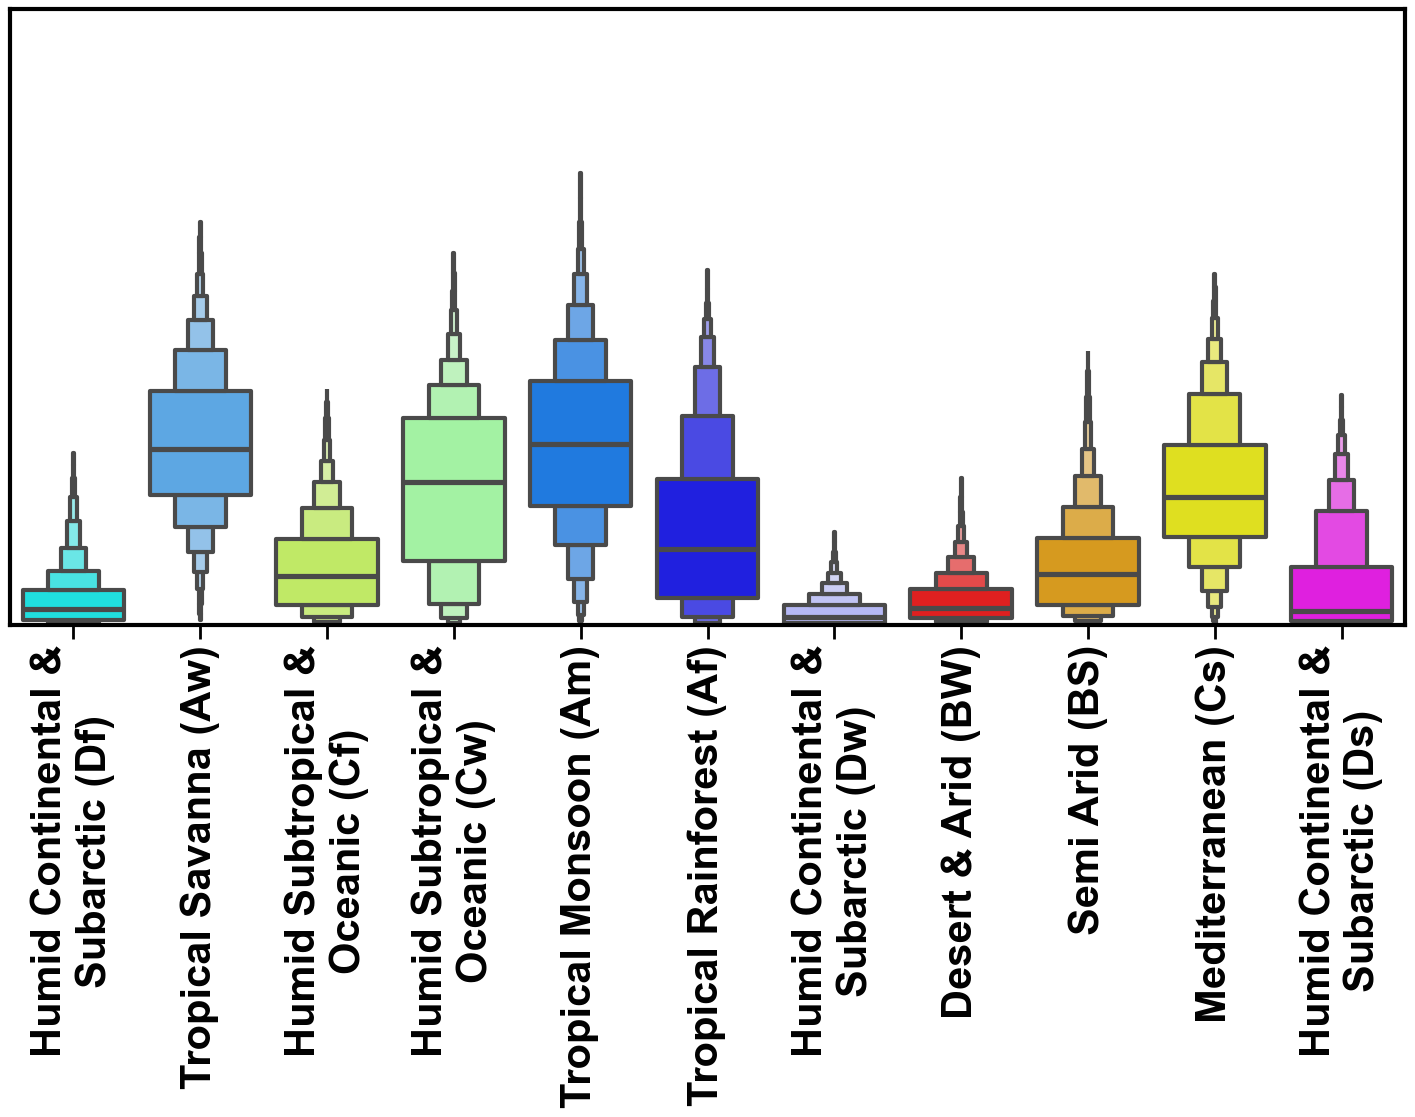

In [6]:
fig = plt.figure(figsize=(18, 8))

aesthetics_reorder_sorted = aesthetics_reorder.sort_values(by='number', ascending=True)
sns.boxenplot(x="Koppen_Together", y="Sbedrock", data=df_Koppen_sorted, linewidth=3,
              hue='Koppen_Together',palette=aesthetics_reorder_sorted['color'].unique(),
              order=aesthetics_reorder['number'].unique(),legend=False,    
              k_depth="proportion", outlier_prop=0.0078125, showfliers=False)
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

area_name = (aesthetics_reorder['area_sum'].unique()/1e9).round().astype(int)
print(area_name)
# for i, label in enumerate(ax.get_xticklabels()):
#     x_pos = label.get_position()[0]
#     median_value = df_Koppen_sorted[df_Koppen_sorted['Koppen_Together']==aesthetics_reorder['number'].unique()[i]]['Sbedrock'].median()
#     ax.text(x_pos, 1.5*median_value+300, f'{area_name[i]}', ha='center', va='bottom', fontsize=30, fontweight='bold', color='black')

plt.xlabel('')  
plt.ylabel("")  

plt.xticks(ticks=(aesthetics_reorder.index), labels=aesthetics_reorder['name'].unique(), fontsize=30, fontweight='bold',rotation = 'vertical')

plt.ylim(0, 800)
yticks = np.arange(0, 900, 100)
# plt.yticks(ticks=yticks, labels=yticks,fontsize=30, fontweight='bold')
plt.yticks([])
plt.show()
# fig.savefig('boxenplot2.pdf')

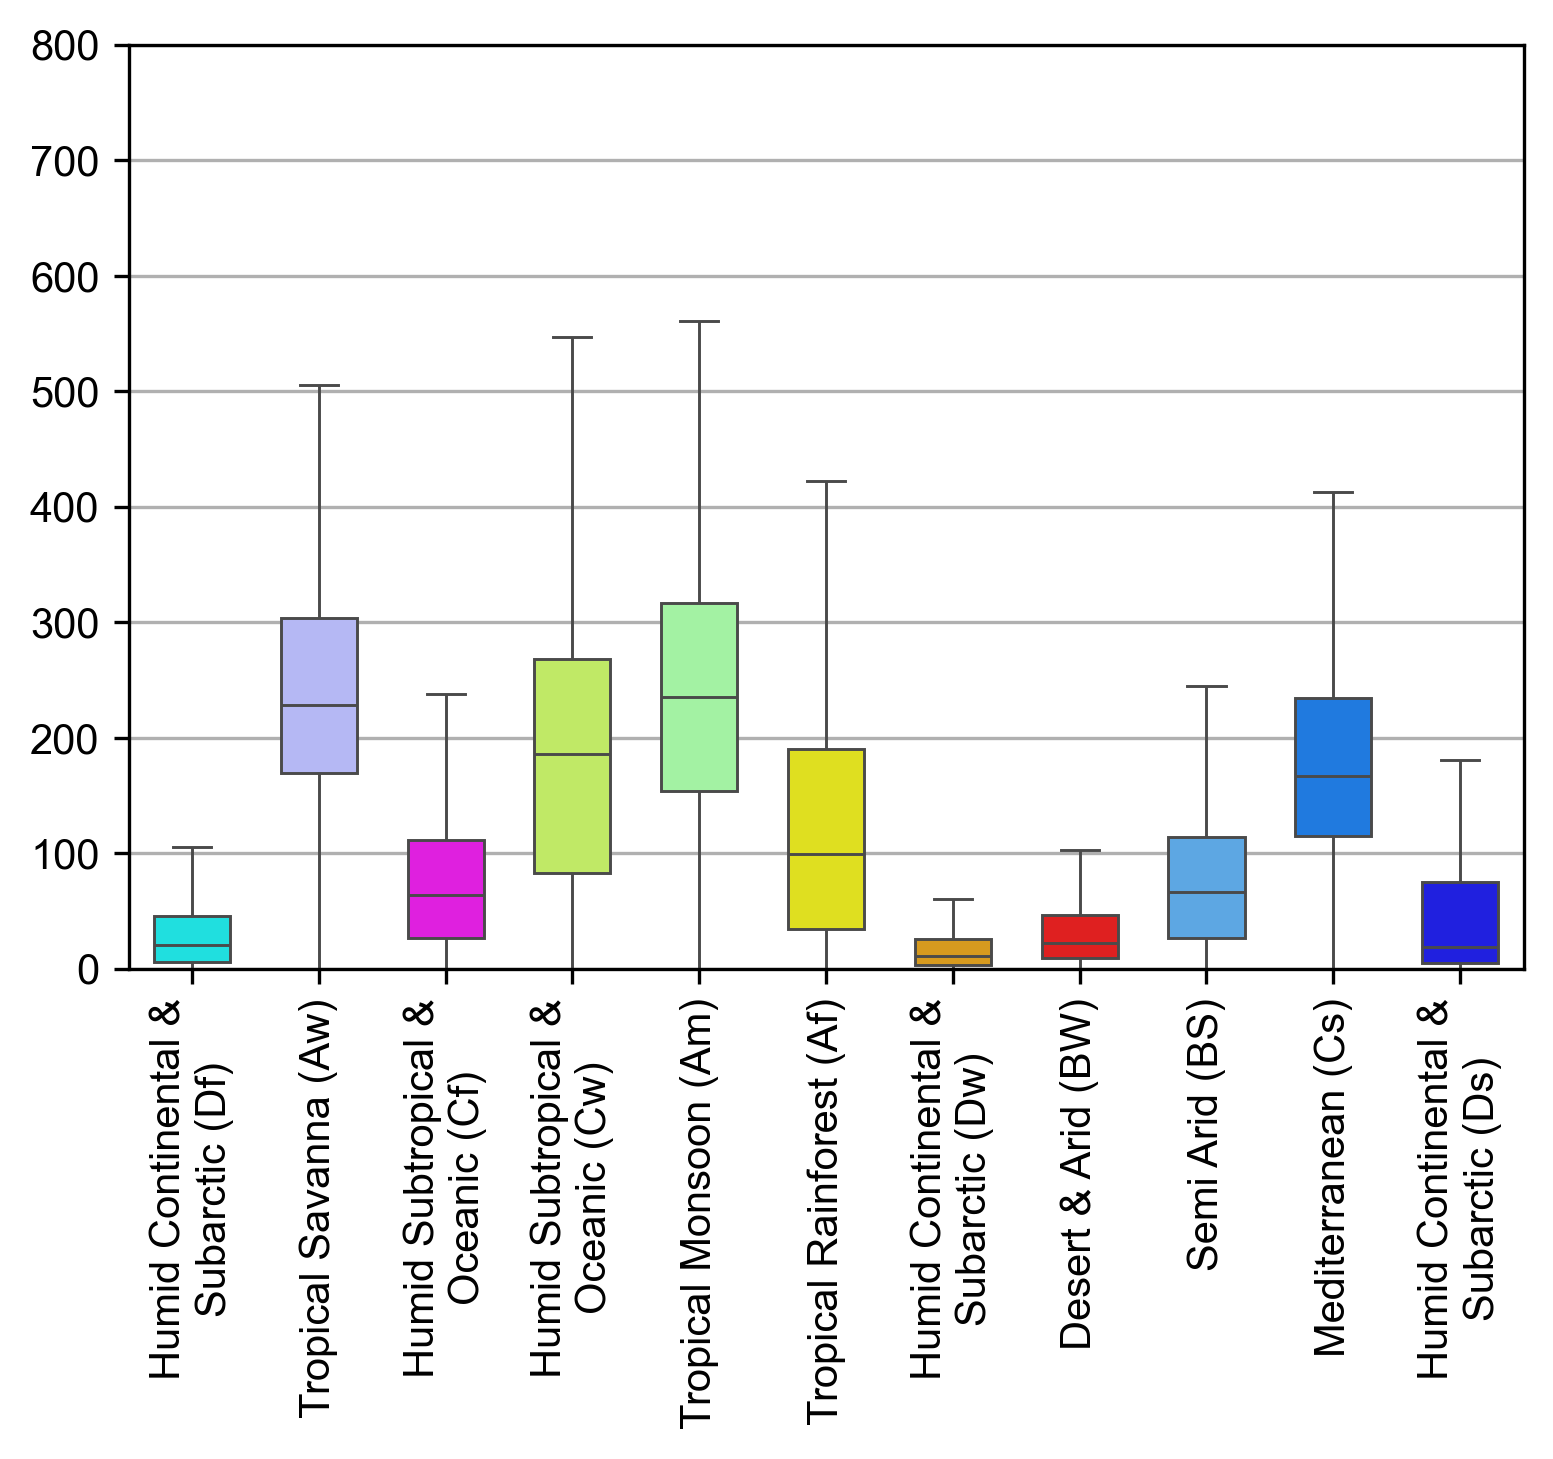

In [7]:
# set figure size
f, ax = plt.subplots(figsize=(6, 4), dpi=300) 
order = koppen_area_sum.index.tolist()
# sns.boxplot(x="Koppen_Together", y="Sbedrock", hue = "Koppen_Together", data=df_Koppen, width=.6, linewidth = .7, palette=aesthetics['color'].tolist(), whis = 1.5, showfliers = False)
sns.boxplot(x="Koppen_Together", y="Sbedrock", hue = "Area_sum", data=df_Koppen_sorted, width=.6, linewidth = .7, palette=aesthetics_reorder_sorted['color'].tolist(), whis = 1.5, showfliers = False, order=order)
plt.legend().remove()

# Tweak the visual presentation
# plt.xticks(np.arange(0, 11, step=1), labels = aesthetics['name'],rotation = 'vertical') # rotation='25', ha="right"
plt.xticks(np.arange(0, 11, step=1), labels = aesthetics_reorder['name'],rotation = 'vertical') # rotation='25', ha="right"
ax.yaxis.grid(True)
#ax.set_title('Köppen Climate Type')
ax.set_axisbelow(True)
#ax.set_xlabel(labels)
ax.set_ylim(0, 800)
ax.set_xlabel("")
ax.set_ylabel("")
#ax.set_ylabel('$S_{bedrock}$ (mm)')

# Uncomment to download fig:
plt.rcParams['pdf.fonttype'] = 42
# plt.savefig(f"{fig_path}/b1_Koppen.pdf", transparent=True, bbox_inches='tight')
# plt.savefig(f"{fig_path}/b1_Koppen_reorder.pdf", transparent=True, bbox_inches='tight')

In [8]:
## Check that no IGBP groups have less than 2km area
df_IGBP = df.copy()

#Remove IGBP 3 = Deciduous needleleaf forest
df_IGBP = df_IGBP[df_IGBP['IGBP'] < 10]
df_IGBP = df_IGBP[df_IGBP['IGBP'] > 0]
# df_IGBP = df_IGBP[df_IGBP['IGBP'] != 3]


igbp_area_sum = df_IGBP.groupby('IGBP')['Area'].sum().sort_values(ascending=False)
# print(igbp_area_sum)

df_IGBP_reorder = df_IGBP.merge(igbp_area_sum, how='left', on='IGBP', suffixes=('', '_sum'))
df_IGBP_sorted = df_IGBP_reorder.sort_values(by='Area_sum', ascending=False)
# print(df_IGBP_sorted)

lcoi = ['Evergreen Needleleaf\nForests','Evergreen Broadleaf\nForests',
        'Deciduous Needleleaf\nForests','Deciduous Broadleaf\nForests',
        'Mixed Forests',
        'Closed Shrublands','Open Shrublands',
        'Woody Savannas','Savannas','Grassland']
qgis_colors = ['#f8de85', '#FAC13E','#a5537f','#a52653',
               '#c04a02','#A4B381','#52B33F','#74B3B8',
               '#428ac8','#7846A8']
# qgis_colors = ['#05450a', '#086a10', '#54a708', '#78d203', 
#                 '#009900','#c6b044', '#dcd159', '#dade48',  
#                 '#fbff13']
IGBPList = ['Evergreen Needleleaf\nForests', 'Evergreen Broadleaf\nForests', 
            'Deciduous Needleleaf\nForests', 'Deciduous Broadleaf\nForests', 
            'Mixed Forests', 
            'Closed Shrublands', 'Open Shrublands', 
            'Woody Savannas', 'Savannas', 
            'Grasslands', 'Permanent Wetlands', 'Croplands', 
            'Urban and Built-up Lands', 'Cropland/Natural Vegetation Mosaics', 
            'Permanent Snow and Ice', 'Barren', 'Water Bodies']
land_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9,10]

land_aes = pd.DataFrame()
land_aes['name'] = lcoi
land_aes['number'] = land_numbers
land_aes['color'] = qgis_colors

# Filter Koppen data and aesthetics by group for plotting:
IGBP_ids = df_IGBP['IGBP'].unique()
land_aesthetics = land_aes[land_aes.number.isin(IGBP_ids)]

land_aesthetics_reorder = land_aes[land_aes.number.isin(IGBP_ids)].copy()
land_aesthetics_reorder['Area_sum'] = land_aesthetics_reorder['number'].map(igbp_area_sum)
land_aesthetics_reorder = land_aesthetics_reorder.sort_values(by='Area_sum', ascending=False)
land_aesthetics_reorder.reset_index(drop=True, inplace=True)
print(land_aesthetics_reorder)

                            name  number    color      Area_sum
0                       Savannas       9  #428ac8  6.541299e+12
1                 Woody Savannas       8  #74B3B8  4.923170e+12
2   Evergreen Broadleaf\nForests       2  #FAC13E  4.848233e+12
3                Open Shrublands       7  #52B33F  3.021386e+12
4                  Mixed Forests       5  #c04a02  2.414268e+12
5   Deciduous Broadleaf\nForests       4  #a52653  1.654552e+12
6  Evergreen Needleleaf\nForests       1  #f8de85  1.133955e+12
7  Deciduous Needleleaf\nForests       3  #a5537f  2.203484e+11
8              Closed Shrublands       6  #A4B381  7.458720e+10


In [9]:
print(df_IGBP_sorted.groupby('IGBP')['Sbedrock'].median())

IGBP
1     29.330763
2    170.977150
3     23.618570
4     64.355335
5     38.591524
6     29.773490
7     13.534952
8     40.858086
9    103.549305
Name: Sbedrock, dtype: float64


/tmp/ipykernel_3930291/3737513955.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxenplot(x="IGBP", y="Sbedrock", data=df_IGBP_sorted, linewidth=3,


[6541 4923 4848 3021 2414 1655 1134  220   75]


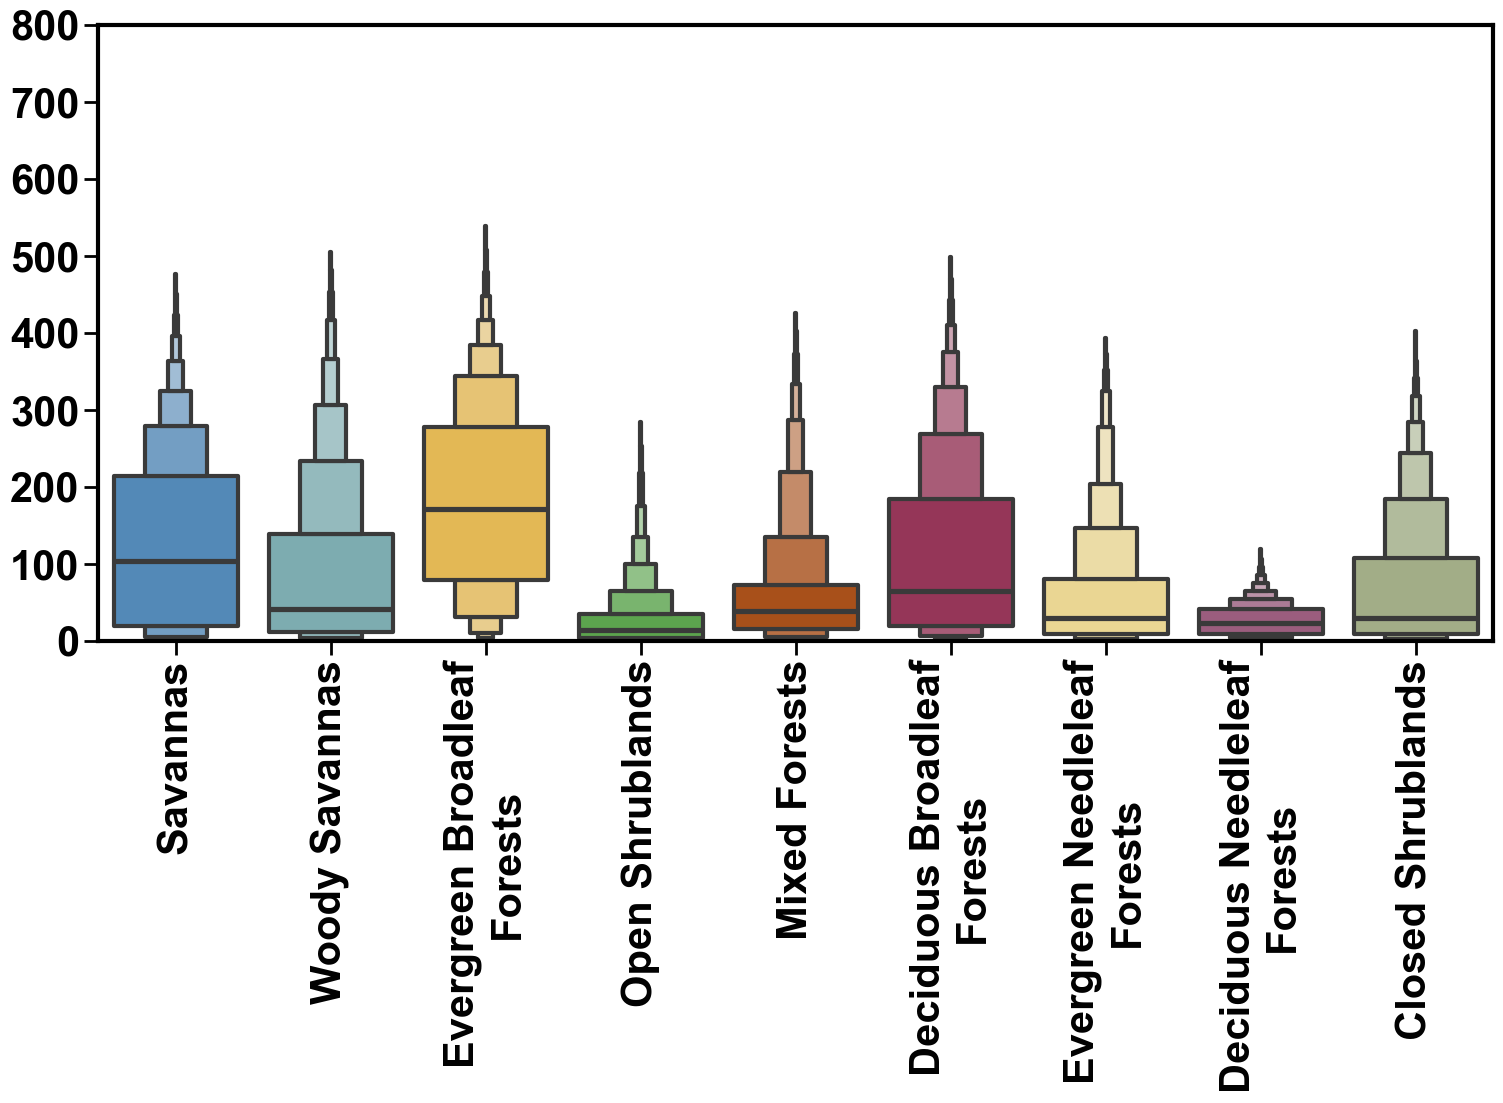

In [10]:
fig = plt.figure(figsize=(18, 8))

land_aesthetics_reorder_sorted = land_aesthetics_reorder.sort_values(by='number', ascending=True)
# print(land_aesthetics_reorder_sorted['color'].unique())
sns.boxenplot(x="IGBP", y="Sbedrock", data=df_IGBP_sorted, linewidth=3,
              hue='IGBP',palette=land_aesthetics_reorder_sorted['color'].unique(),
              order=land_aesthetics_reorder['number'].unique(), legend=False,
              k_depth="proportion", outlier_prop=0.0078125, showfliers=False)
      
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

area_name = (land_aesthetics_reorder['Area_sum'].unique()/1e9).round().astype(int)
print(area_name)
# for i, label in enumerate(ax.get_xticklabels()):
#     x_pos = label.get_position()[0]
#     median_value = df_IGBP_sorted[df_IGBP_sorted['IGBP']==land_aesthetics_reorder['number'].unique()[i]]['Sbedrock'].median()
#     ax.text(x_pos, median_value*1.2+480, f'{area_name[i]}', ha='center', va='bottom', fontsize=30, fontweight='bold', color='black')

plt.xlabel('')  
plt.ylabel("")  

plt.xticks(ticks=(land_aesthetics_reorder.index), labels=land_aesthetics_reorder['name'].unique(), fontsize=30, fontweight='bold',rotation = 'vertical')

plt.ylim(0, 800)
yticks = np.arange(0, 900, 100)
plt.yticks(ticks=yticks, labels=yticks,fontsize=30, fontweight='bold')
plt.show()

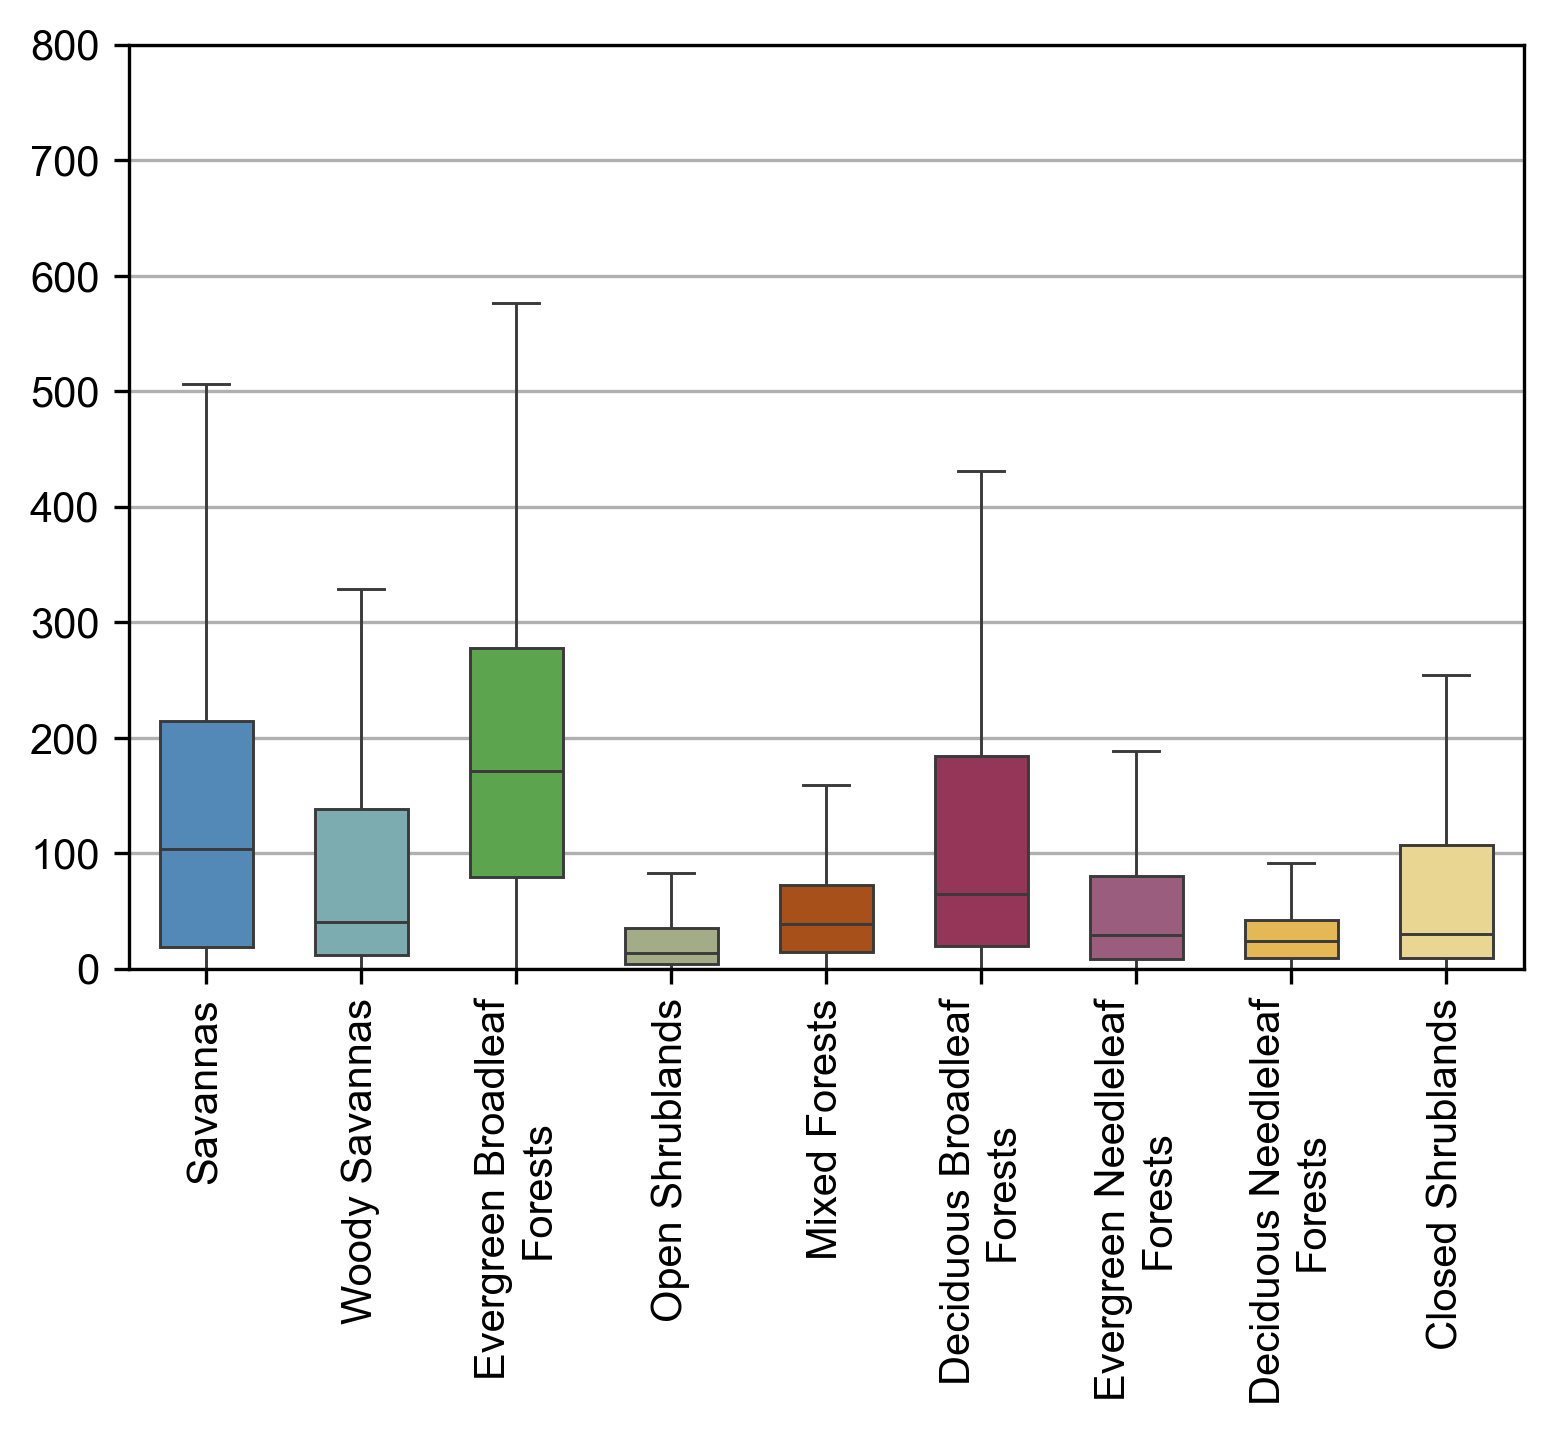

In [11]:
# Set fig size
f, ax = plt.subplots(figsize=(6, 4),dpi=300)
order = igbp_area_sum.index.tolist()
# sns.boxplot(x="IGBP", y="Sbedrock", data=df_IGBP, hue = "IGBP", width=.6, linewidth = .7, palette = land_aesthetics['color'].tolist(), whis = 1.5, showfliers = False)
sns.boxplot(x="IGBP", y="Sbedrock", data=df_IGBP_sorted, hue = "Area_sum", width=.6, linewidth = .7, palette = land_aesthetics_reorder_sorted['color'].tolist(), whis = 1.5, showfliers = False, order=order)
plt.legend().remove()
# plt.xticks(np.arange(0, 9, step=1), labels = land_aesthetics['name'], rotation = 'vertical') # rotation='25', ha="right"
plt.xticks(np.arange(0, 9, step=1), labels = land_aesthetics_reorder['name'], rotation = 'vertical') # rotation='25', ha="right"

# for i, label in enumerate(ax.get_xticklabels()):
#     x_pos = label.get_position()[0]
#     ax.text(x_pos+0.3, 85, f'{igbp_area_sum[i]:i4}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')
    
# Tweak the visual presentation
plt.xticks(rotation='vertical')
ax.set_axisbelow(True)
#ax.set_title('Biome')
ax.set_xlabel("")
ax.set_ylabel("")
ax.yaxis.grid(True)
ax.set_ylim(0, 800)
#ax.set_ylabel('$S_{bedrock}$ (mm)')

# Uncomment to download fig:
plt.rcParams['pdf.fonttype'] = 42
# plt.savefig(f"{fig_path}/b1_IGBP.pdf", transparent=True, bbox_inches='tight')
plt.savefig(f"{fig_path}/b1_IGBP_reorder.pdf", transparent=True, bbox_inches='tight')

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df1= df.copy()
df1= df1[df1['Koppen'] > 0]
df1= df1[df1['Koppen'] < 29]
df1 = df1[df1['IGBP'] < 10]
df1 = df1[df1['IGBP'] > 0]

df1['Koppen_Together'] = df1['Koppen'].replace(to_replace=[5, 7, 9, 10, 12, 13, 15, 16, 18, 19, 20, 22, 23, 24, 26, 27, 28], value=[4, 6, 8, 8, 11, 11, 14, 14, 17, 17, 17, 21, 21, 21, 25, 25, 25])

KoppenList = ['Tropical Rainforest (Af)','Tropical Monsoon (Am)','Tropical Savanna (Aw)',
              'Desert (BWh)','Arid (BWk)',
              'Semi Arid (BSh)','Semi Arid (BSk)',
              'Mediterranean (Csa)','Mediterranean (Csb)','Mediterranean (Csc)',
              'Humid Subtropical (Cwa)','Oceanic (Cwb)','Ocanic (Cwc)',
              'Humid Subtropical (Cfa)','Oceanic (Cfb)','Oceanic (Cfc)',
              'Humid Continental (Dsa)','Humid Continental (Dsb)','Subarctic (Dsc)','Subarctic (Dsd)',
              'Humid Continental (Dwa)','Humid Continental (Dwb)','Subarctic (Dwc)','Subarctic (Dwd)',
              'Humid Continental (Dfa)','Humid Continental (Dfb)','Subarctic (Dfc)','Subarctic (Dfd)',
              'Tundra (ET)', 'Tundra (EF)']
IGBPList = ['Evergreen Needleleaf Forests', 'Evergreen Broadleaf Forests', 
            'Deciduous Needleleaf Forests', 'Deciduous Broadleaf Forests', 
            'Mixed Forests', 
            'Closed Shrublands', 'Open Shrublands', 
            'Woody Savannas', 'Savannas', 
            'Grasslands', 'Permanent Wetlands', 'Croplands', 
            'Urban and Built-up Lands', 'Cropland/Natural Vegetation Mosaics', 
            'Permanent Snow and Ice', 'Barren', 'Water Bodies']

igbp_dict = {i: IGBPList[i-1] for i in range(1, 18)}
koppen_dict = {i: KoppenList[i-1] for i in range(1, 31)}  

df1['Koppen_Name'] = df1['Koppen_Together'].map(koppen_dict)
df1['IGBP_Name'] = df1['IGBP'].map(igbp_dict)

In [13]:
stats1 = df1.groupby(['IGBP']).agg(  
    sbedrock_mean=('Sbedrock', 'mean'),    
    area_total=('Area', 'sum'),          
).reset_index()

df_area1 = pd.pivot_table(
    df1,
    index=['IGBP'],
    columns='Dbedrock_Frequency',
    values='Area',
    aggfunc='sum',
    fill_value=0
).reset_index()

df_area1.columns = ['IGBP', 'Pattern1_area', 'Pattern2_area']
stats1 = stats1.merge(df_area1, on=['IGBP'], how='left')

stats1['area_total'] = stats1['area_total']/1e6
stats1['Pattern1_area'] = stats1['Pattern1_area'] / 1e6
stats1['Pattern2_area'] = stats1['Pattern2_area'] / 1e6
stats_sorted1 = stats1.sort_values(by='area_total', ascending=False)
stats_sorted1

,IGBP,sbedrock_mean,area_total,Pattern1_area,Pattern2_area
8,9,128.851315,6.492885e+06,3.562660e+06,2.930225e+06
7,8,91.278231,4.875100e+06,1.692282e+06,3.182818e+06
1,2,183.792336,4.844507e+06,2.095295e+06,2.749212e+06
6,7,30.829112,2.760743e+06,7.206580e+05,2.040085e+06
4,5,63.187300,2.399401e+06,4.958409e+05,1.903560e+06
3,4,111.744159,1.652132e+06,5.653778e+05,1.086754e+06
0,1,60.666637,1.117136e+06,4.095987e+05,7.075372e+05
2,3,27.762997,2.202681e+05,1.496142e+04,2.053067e+05
5,6,74.916807,6.817432e+04,2.612684e+04,4.204748e+04


In [14]:
stats2 = df1.groupby(['Koppen_Together']).agg(
    sbedrock_mean=('Sbedrock', 'mean'),    
    area_total=('Area', 'sum'),          
).reset_index()

df_area2 = pd.pivot_table(
    df1,
    index=['Koppen_Together'],
    columns='Dbedrock_Frequency',
    values='Area',
    aggfunc='sum',
    fill_value=0
).reset_index()

df_area2.columns = ['Koppen_Together', 'Pattern1_area', 'Pattern2_area']
stats2 = stats2.merge(df_area2, on=['Koppen_Together'], how='left')

stats2['area_total'] = stats2['area_total']/1e6
stats2['Pattern1_area'] = stats2['Pattern1_area'] / 1e6
stats2['Pattern2_area'] = stats2['Pattern2_area'] / 1e6
stats_sorted2 = stats2.sort_values(by='area_total', ascending=False)
stats_sorted2

,Koppen_Together,sbedrock_mean,area_total,Pattern1_area,Pattern2_area
10,25,32.875172,6.195557e+06,1.144606e+06,5.050950e+06
2,3,237.460342,5.159787e+06,4.228423e+06,9.313645e+05
7,14,76.317332,2.623836e+06,2.557730e+05,2.368063e+06
6,11,179.960886,2.306525e+06,1.326896e+06,9.796287e+05
1,2,237.456644,1.961770e+06,1.100325e+06,8.614456e+05
0,1,125.753432,1.646400e+06,2.060910e+05,1.440309e+06
9,21,18.043035,1.555588e+06,2.210757e+05,1.334512e+06
3,4,32.330991,1.009825e+06,1.193633e+05,8.904615e+05
4,6,78.870705,8.105010e+05,2.716187e+05,5.388822e+05
5,8,178.605182,6.140795e+05,4.134960e+05,2.005835e+05


In [15]:
# stats_sorted12 = stats_sorted1[stats_sorted1['area_total']>4e5]
stats_sorted12 = stats_sorted1.copy()
stats_sorted12['Pattern1'] = (stats_sorted12['Pattern1_area']/stats_sorted12['area_total']*100).round().astype(int)
stats_sorted12['Pattern2'] = (stats_sorted12['Pattern2_area']/stats_sorted12['area_total']*100).round().astype(int)
stats_sorted12['sbedrock_mean'] = stats_sorted12['sbedrock_mean'].round().astype(int)
stats_sorted12['area_total'] = stats_sorted12['area_total'].round().astype(int)
stats_sorted12['Pattern1_area'] = stats_sorted12['Pattern1_area'].round().astype(int)
stats_sorted12['Pattern2_area'] = stats_sorted12['Pattern2_area'].round().astype(int)

stats_sorted12

,IGBP,sbedrock_mean,area_total,Pattern1_area,Pattern2_area,Pattern1,Pattern2
8,9,129,6492885,3562660,2930225,55,45
7,8,91,4875100,1692282,3182818,35,65
1,2,184,4844507,2095295,2749212,43,57
6,7,31,2760743,720658,2040085,26,74
4,5,63,2399401,495841,1903560,21,79
3,4,112,1652132,565378,1086754,34,66
0,1,61,1117136,409599,707537,37,63
2,3,28,220268,14961,205307,7,93
5,6,75,68174,26127,42047,38,62


In [16]:
# stats_sorted22 = stats_sorted2[stats_sorted2['area_total']>4e5]
stats_sorted22 = stats_sorted2.copy()

stats_sorted22['Pattern1'] = (stats_sorted22['Pattern1_area']/stats_sorted22['area_total']*100).round().astype(int)
stats_sorted22['Pattern2'] = (stats_sorted22['Pattern2_area']/stats_sorted22['area_total']*100).round().astype(int)
stats_sorted22['sbedrock_mean'] = stats_sorted22['sbedrock_mean'].round().astype(int)
stats_sorted22['area_total'] = stats_sorted22['area_total'].round().astype(int)
stats_sorted22['Pattern1_area'] = stats_sorted22['Pattern1_area'].round().astype(int)
stats_sorted22['Pattern2_area'] = stats_sorted22['Pattern2_area'].round().astype(int)

stats_sorted22

,Koppen_Together,sbedrock_mean,area_total,Pattern1_area,Pattern2_area,Pattern1,Pattern2
10,25,33,6195557,1144606,5050950,18,82
2,3,237,5159787,4228423,931365,82,18
7,14,76,2623836,255773,2368063,10,90
6,11,180,2306525,1326896,979629,58,42
1,2,237,1961770,1100325,861446,56,44
0,1,126,1646400,206091,1440309,13,87
9,21,18,1555588,221076,1334512,14,86
3,4,32,1009825,119363,890462,12,88
4,6,79,810501,271619,538882,34,66
5,8,179,614079,413496,200583,67,33


/tmp/ipykernel_3930291/1433795255.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxenplot(
/tmp/ipykernel_3930291/1433795255.py:32: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxenplot(


Koppen area_name: [6196 5160 2624 2307 1962 1646 1556 1010  811  614  546]
IGBP area_name: [6541 4923 4848 3021 2414 1655 1134  220   75]


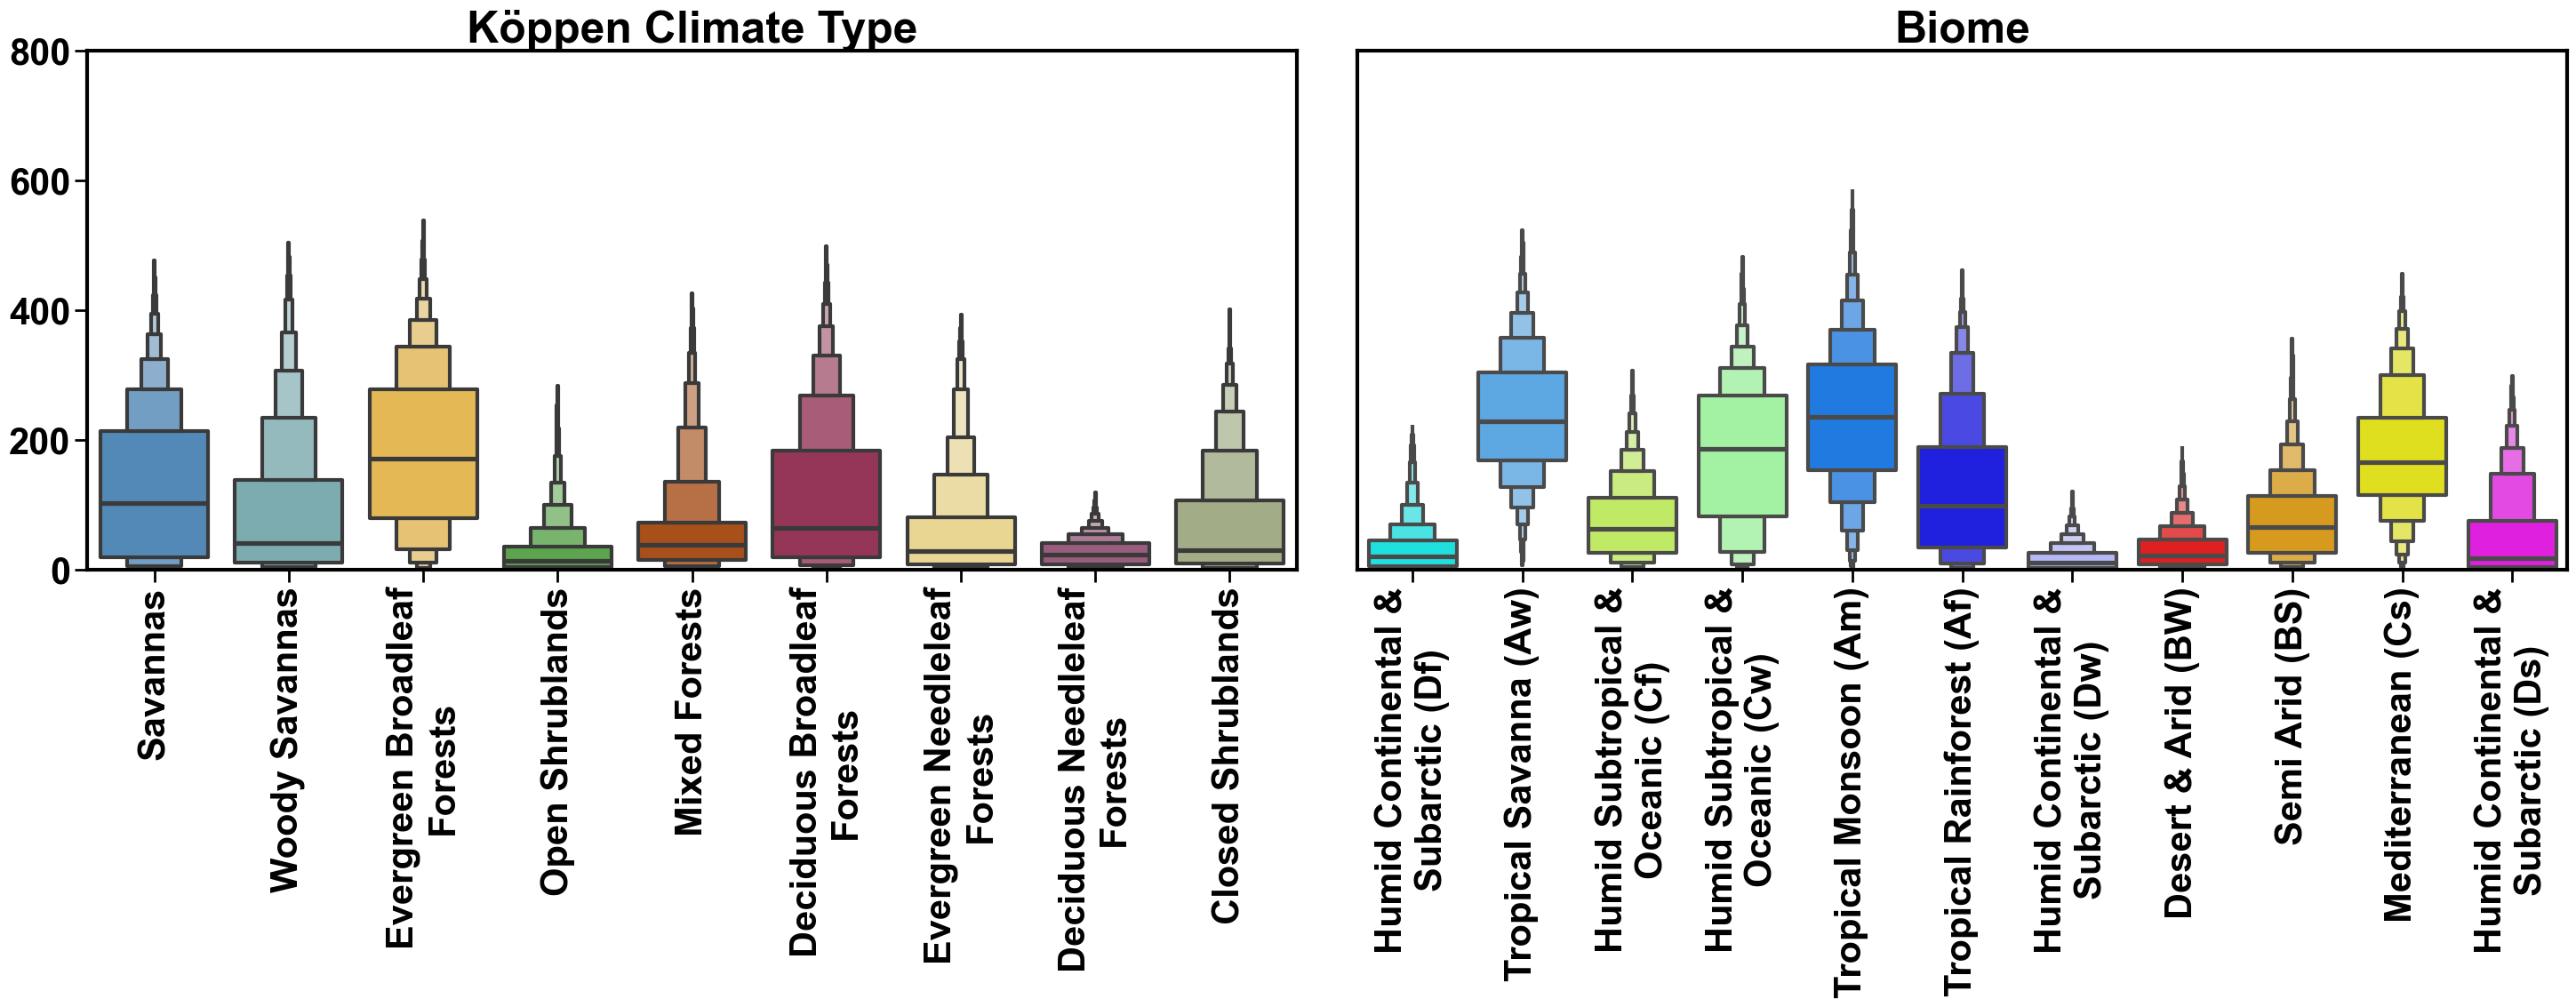

/tmp/ipykernel_3930291/1433795255.py:100: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0, right=1,


NameError: name 'GridSpec' is not defined

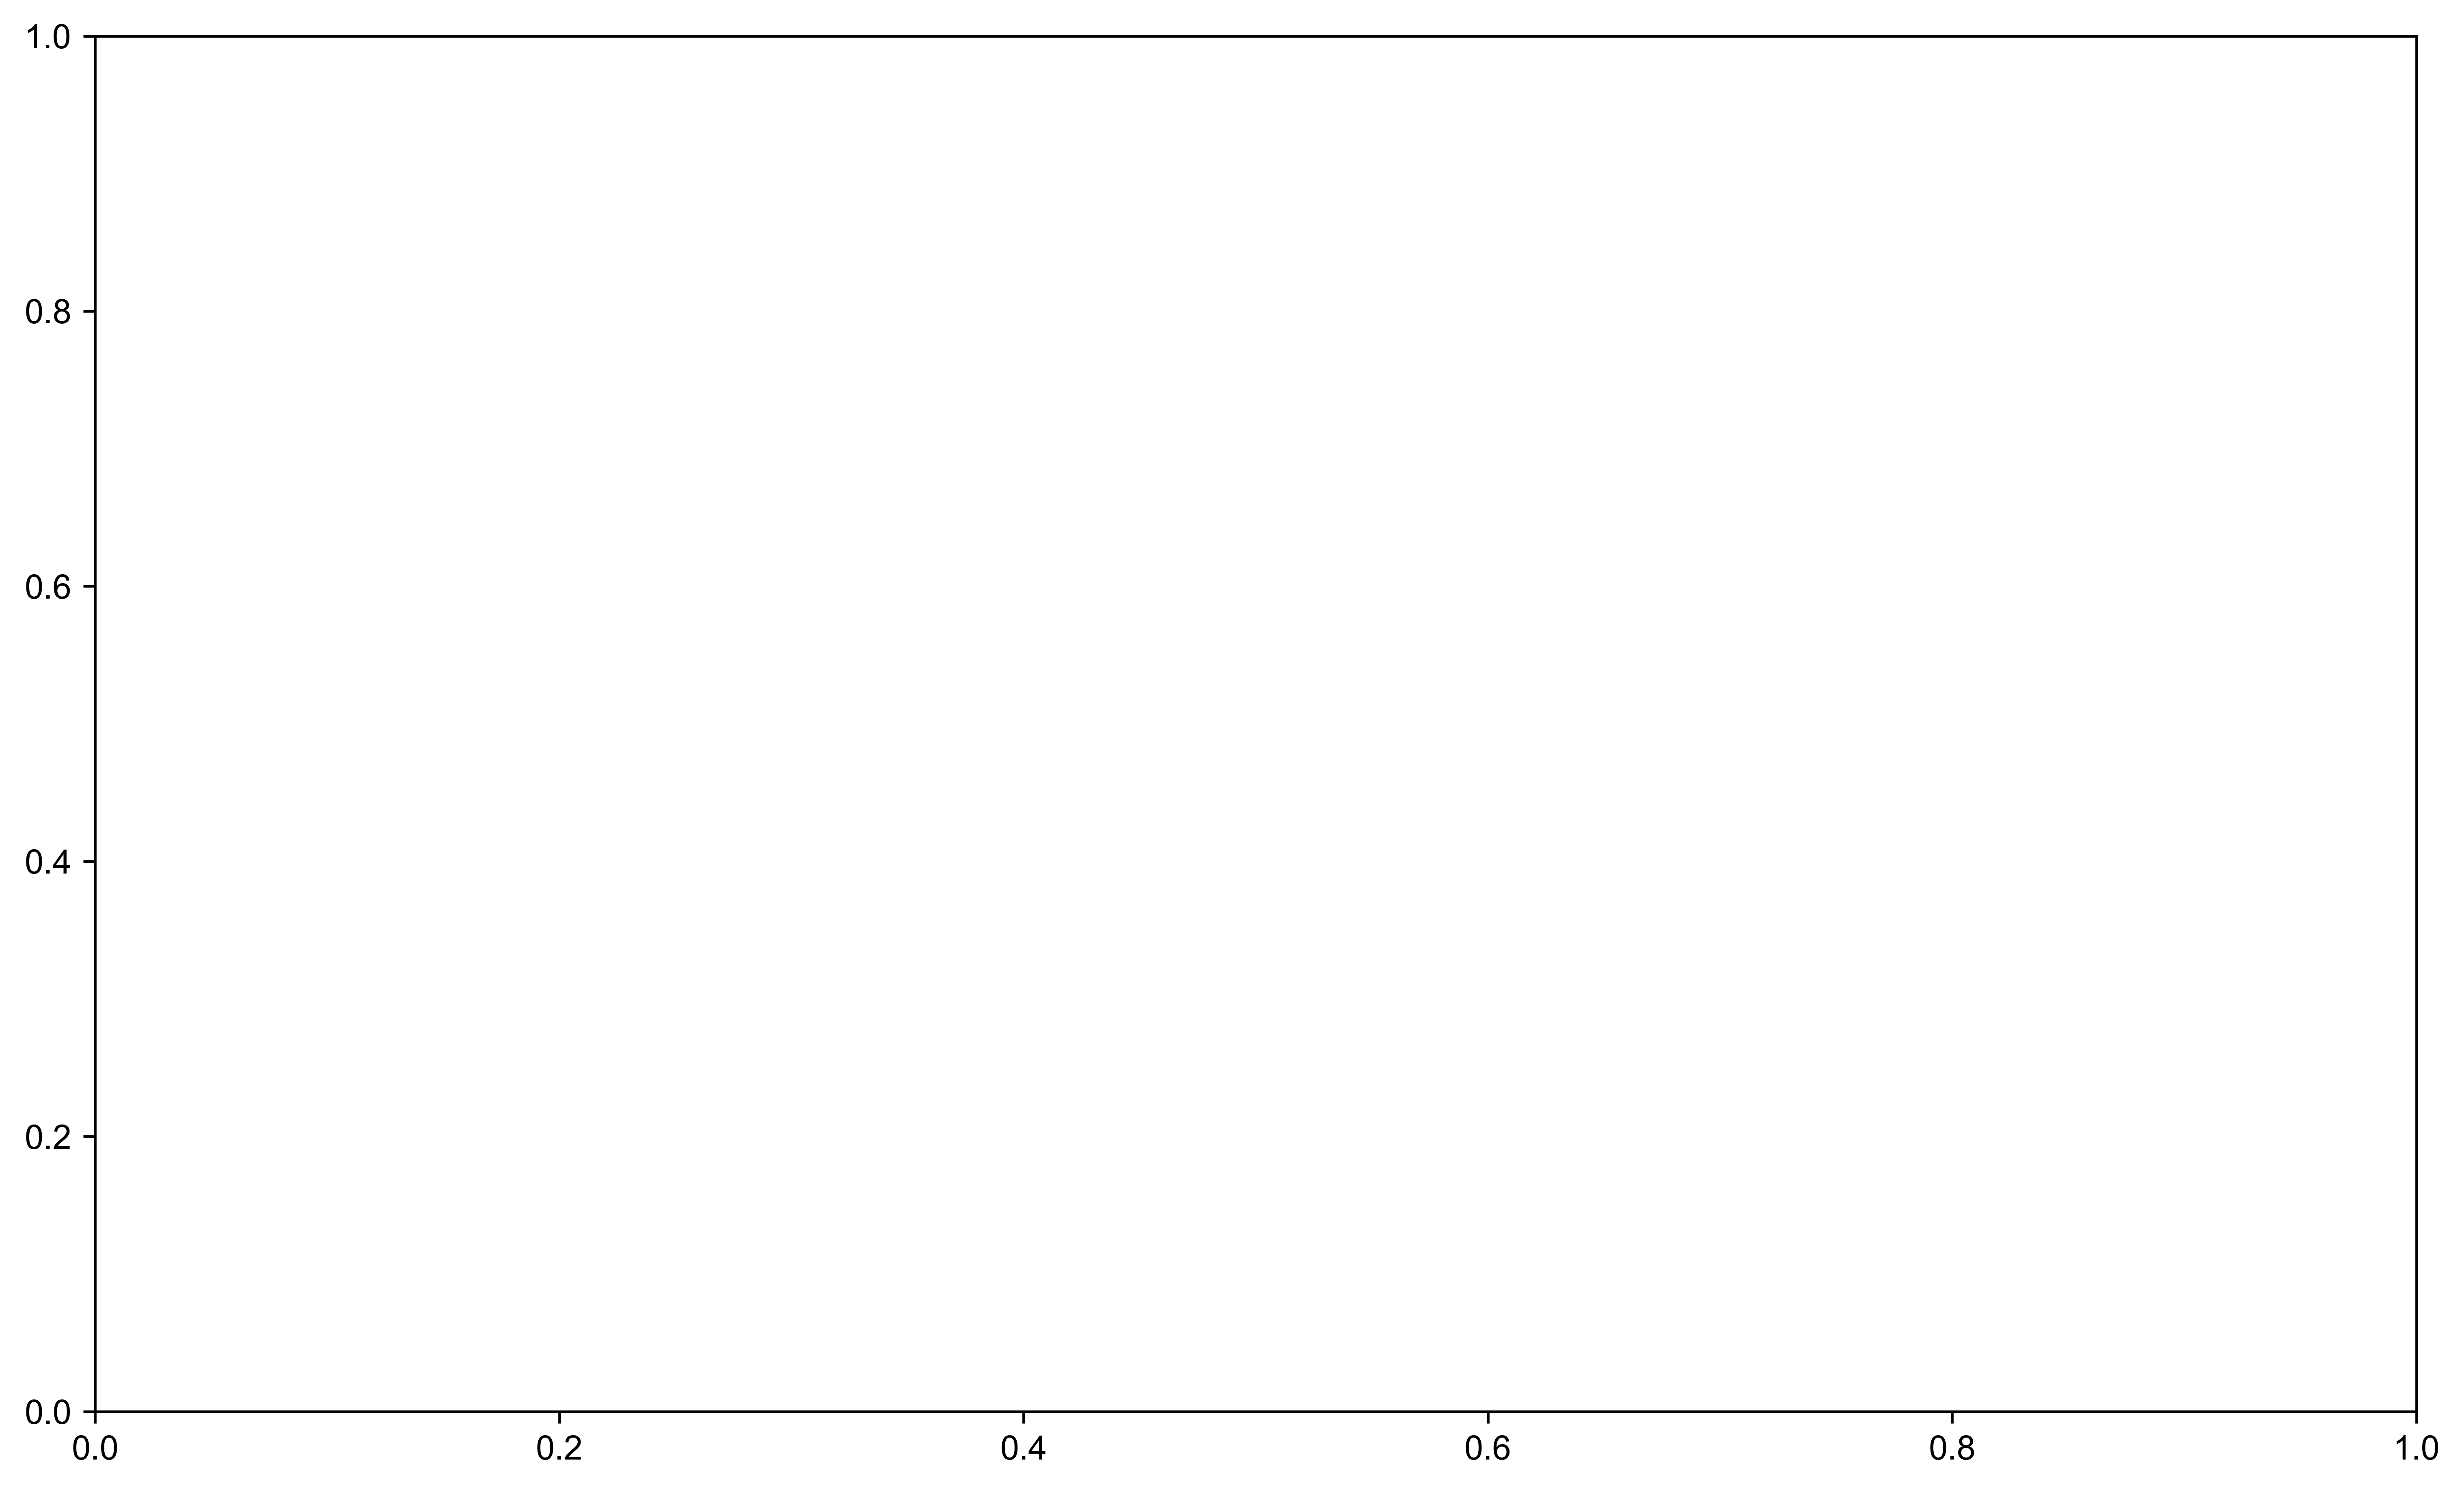

In [17]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(36, 8), sharey=True)

# 第一个子图：Koppen_Together 的箱线图
aesthetics_reorder_sorted = aesthetics_reorder.sort_values(by='number', ascending=True)
sns.boxenplot(
    x="Koppen_Together", y="Sbedrock", data=df_Koppen_sorted, linewidth=3,
    hue='Koppen_Together', palette=aesthetics_reorder_sorted['color'].unique(),
    order=aesthetics_reorder['number'].unique(), legend=False,
    k_depth="proportion", outlier_prop=0.0078125, showfliers=False, ax=ax1
)

# 设置第一个子图的刻度和边框
ax1.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax1.tick_params(axis='y', which='major', length=10, width=0, direction='out')
for spine in ax1.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(3)

# 设置第一个子图的 x 轴标签
ax1.set_xlabel('')  # 清空 x 轴标签
ax1.set_ylabel('')  # 清空 y 轴标签
ax1.set_title('Biome', fontsize=36, fontweight='bold')
ax1.set_xticks(aesthetics_reorder.index)
ax1.set_xticklabels(aesthetics_reorder['name'].unique(), fontsize=30, fontweight='bold', rotation='vertical')

# 设置第一个子图的 y 轴范围和刻度
ax1.set_ylim(0, 800)
ax1.set_yticks([])  # 第一个子图不显示 y 轴刻度标签

# 第二个子图：IGBP 的箱线图
land_aesthetics_reorder_sorted = land_aesthetics_reorder.sort_values(by='number', ascending=True)
sns.boxenplot(
    x="IGBP", y="Sbedrock", data=df_IGBP_sorted, linewidth=3,
    hue='IGBP', palette=land_aesthetics_reorder_sorted['color'].unique(),
    order=land_aesthetics_reorder['number'].unique(), legend=False,
    k_depth="proportion", outlier_prop=0.0078125, showfliers=False, ax=ax2
)

# 设置第二个子图的刻度和边框
ax2.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax2.tick_params(axis='y', which='major', length=10, width=2, direction='out')
for spine in ax2.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(3)

# 设置第二个子图的 x 轴标签
ax2.set_xlabel('')  # 清空 x 轴标签
ax2.set_ylabel('$S_{{bedrock}}$ (mm)')  # 清空 y 轴标签
ax2.set_title('Köppen Climate Type', fontsize=36, fontweight='bold')
ax2.set_xticks(land_aesthetics_reorder.index)
ax2.set_xticklabels(land_aesthetics_reorder['name'].unique(), fontsize=30, fontweight='bold', rotation='vertical')

# 设置第二个子图的 y 轴范围和刻度
ax2.set_ylim(0, 800)
yticks = np.arange(0, 1000, 200)
ax2.set_yticks(yticks)
ax2.set_yticklabels(yticks, fontsize=30, fontweight='bold')

# 添加面积标签（如果需要）
area_name_koppen = (aesthetics_reorder['area_sum'].unique() / 1e9).round().astype(int)
print("Koppen area_name:", area_name_koppen)
area_name_igbp = (land_aesthetics_reorder['Area_sum'].unique() / 1e9).round().astype(int)
print("IGBP area_name:", area_name_igbp)

# 取消注释以添加面积文本（如果需要）
# for i, label in enumerate(ax1.get_xticklabels()):
#     x_pos = label.get_position()[0]
#     median_value = df_Koppen_sorted[df_Koppen_sorted['Koppen_Together'] == aesthetics_reorder['number'].unique()[i]]['Sbedrock'].median()
#     ax1.text(x_pos, 1.5 * median_value + 300, f'{area_name_koppen[i]}', ha='center', va='bottom', fontsize=30, fontweight='bold', color='black')

# for i, label in enumerate(ax2.get_xticklabels()):
#     x_pos = label.get_position()[0]
#     median_value = df_IGBP_sorted[df_IGBP_sorted['IGBP'] == land_aesthetics_reorder['number'].unique()[i]]['Sbedrock'].median()
#     ax2.text(x_pos, median_value * 1.2 + 480, f'{area_name_igbp[i]}', ha='center', va='bottom', fontsize=30, fontweight='bold', color='black')

fig.subplots_adjust(bottom=0.15, wspace=0.05)

plt.show()

size1=45
def scatter_draw(ax,rgb_list,x,y,size=45):
    color = rgb_list[:len(x)] 
    scatter = ax.scatter(x, y, s=size, linewidths=2,
                        edgecolors="k", color=color)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')  
        spine.set_linewidth(2)  

    ax.set_ylim(0, 100)  
    ax.set_xlim(0, 100) 
    # ax.xaxis.set_ticks_position('top') 
    # ax.yaxis.set_ticks_position('right')  
    # ax.xaxis.tick_right()  
    # ax.xaxis.set_label_position("right")  
    ax.set_xticks(np.arange(0,120,20))
    ax.set_xticklabels(np.arange(0,120,20), fontsize=16, fontweight='bold')
    ax.set_aspect('equal', adjustable='box')

fig, ax = plt.subplots(figsize=(10, 6), dpi=600, constrained_layout=True) 
fig.subplots_adjust(left=0, right=1, 
                bottom=0, top=1,  wspace=0) 
gs = GridSpec(1, 2, figure=fig)

ax.set_axis_off()
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# rgb_list = ['#f8de85', '#FAC13E','#a5537f','#a52653',
#             '#c04a02','#A4B381','#52B33F','#74B3B8',
#             '#428ac8','#7846A8']
rgb_list = ['#428ac8', '#74B3B8','#FAC13E','#52B33F','#c04a02','#a52653','#f8de85','#a5537f',
            '#A4B381',]
scatter_draw(ax1,rgb_list,stats_sorted12['Pattern1'],stats_sorted12['sbedrock_mean']/2.5,stats_sorted12['area_total']/2500)
ax1.set_ylabel('mean $S_{{bedrock}}$ (mm)', fontsize=20, fontweight='bold')
ax1.set_yticks(np.arange(0,120,20))
ax1.set_yticklabels(np.arange(0,300,50), fontsize=16, fontweight='bold')

# rgb_list = ['#ffffff','#0000FE','#0077FF','#46A9FA','#FE0000',
#             '#FE9695','#F5A301','#FFDB63','#FDFD45','#C6C700',
#             '#96FF96','#63C764','#329633','#C6FF4E','#66FF33',
#             '#33C701','#FF00FE','#C600C7','#963295','#966495',
#             '#ABB1FF','#5A77DB','#4C51B5','#320087','#18DCDC',
#             '#38C7FF','#007E7D','#00455E','#B2B2B2','#686868']
rgb_list = ['#00FFFF','#46AAFA','#C8FF50','#96FF96','#0078FF','#0000FF','#AAAFFF','#FF0000','#F5A500','#FFFF00','#FF00FF',]
scatter_draw(ax2,rgb_list,stats_sorted22['Pattern1'],stats_sorted22['sbedrock_mean']/2.5,stats_sorted22['area_total']/2500)
ax2.set_yticks([])

fig.suptitle('Pattern1 area as a percentage of total area (%)', fontsize=20, fontweight='bold', y=0.06)

plt.tight_layout() 
plt.show()